In [3]:

words = open('data/names.txt', 'r').read().splitlines()
words = [word.strip() for word in words]
print(f'total words {len(words)}')
max_len = max(len(word) for word in words)
min_len = min(len(word) for word in words)
print(max_len, min_len)
print(f'the head 5 words are {words[:5]}')

# 生成字符序列
chars = sorted(list(set(''.join(words))))
print(f'remove same character length {len(chars)}')
print(chars)

# 字符映射
stoi = {char: idx+1 for idx, char in enumerate(chars)}
stoi['.'] = 0
itos = {idx: char for char, idx in stoi.items()}
print(stoi)
print(itos)

total words 32033
15 2
the head 5 words are ['emma', 'olivia', 'ava', 'isabella', 'sophia']
remove same character length 26
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}
{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


# build dataset
# context_length,: how many characters do we take to predict the next character?  就是我们使用多少个字符去预测下一个字符


In [6]:
import torch


block_size = 3
X, Y = [], []
for word in words[:5]:
    print(f'current word: {word}')
    # 初始化block_size个字符的位置
    context = [0] * block_size
    for ch in word + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), '--->', itos[ix])
        # 向前滑动一个窗口
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

current word: emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
current word: olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
current word: ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
current word: isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
current word: sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [7]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [8]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [9]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [10]:

C = torch.randn(27,2)
emb = C[X]
print(emb.shape)

torch.Size([32, 3, 2])


In [11]:
torch.cat(torch.unbind(emb, dim=1), dim = 1)

tensor([[ 0.3351, -1.2722,  0.3351, -1.2722,  0.3351, -1.2722],
        [ 0.3351, -1.2722,  0.3351, -1.2722, -0.9040,  0.9345],
        [ 0.3351, -1.2722, -0.9040,  0.9345, -0.1158, -0.8346],
        [-0.9040,  0.9345, -0.1158, -0.8346, -0.1158, -0.8346],
        [-0.1158, -0.8346, -0.1158, -0.8346,  0.7532, -0.0045],
        [ 0.3351, -1.2722,  0.3351, -1.2722,  0.3351, -1.2722],
        [ 0.3351, -1.2722,  0.3351, -1.2722, -1.0150,  0.3007],
        [ 0.3351, -1.2722, -1.0150,  0.3007,  0.3462, -0.4863],
        [-1.0150,  0.3007,  0.3462, -0.4863,  0.5590,  0.0940],
        [ 0.3462, -0.4863,  0.5590,  0.0940, -1.3768, -0.0308],
        [ 0.5590,  0.0940, -1.3768, -0.0308,  0.5590,  0.0940],
        [-1.3768, -0.0308,  0.5590,  0.0940,  0.7532, -0.0045],
        [ 0.3351, -1.2722,  0.3351, -1.2722,  0.3351, -1.2722],
        [ 0.3351, -1.2722,  0.3351, -1.2722,  0.7532, -0.0045],
        [ 0.3351, -1.2722,  0.7532, -0.0045, -1.3768, -0.0308],
        [ 0.7532, -0.0045, -1.3768, -0.0

In [15]:
emb_view = emb.view(32, -1)
emb_view == torch.cat(torch.unbind(emb, dim=1), dim = 1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

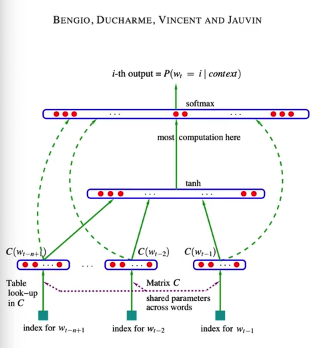

In [19]:
from torch import tanh


w1 = torch.randn((6, 100))
b1 = torch.randn(100)

h = emb.view(emb.shape[0], -1) @ w1 + b1
print(h)
h = tanh(h)
print(h)
print(h.shape)

tensor([[ 2.0569,  1.2596,  3.0945,  ...,  0.2984, -3.8535,  2.5393],
        [ 0.9917,  0.4004,  1.2272,  ..., -2.7990, -3.9233,  1.0865],
        [-1.0557,  0.6536,  1.6912,  ...,  1.6178, -5.3109, -3.0181],
        ...,
        [-9.6327,  1.8772,  1.7812,  ...,  1.0235, -0.6865, -2.2574],
        [-1.9416,  2.3428, -2.0100,  ...,  1.1323,  1.5139,  3.6433],
        [ 1.2707, -1.1200,  0.5743,  ...,  0.5812,  1.1838,  0.3305]])
tensor([[ 0.9678,  0.8510,  0.9959,  ...,  0.2898, -0.9991,  0.9876],
        [ 0.7581,  0.3803,  0.8418,  ..., -0.9926, -0.9992,  0.7956],
        [-0.7840,  0.5741,  0.9343,  ...,  0.9243, -1.0000, -0.9952],
        ...,
        [-1.0000,  0.9542,  0.9448,  ...,  0.7713, -0.5957, -0.9783],
        [-0.9597,  0.9817, -0.9647,  ...,  0.8118,  0.9076,  0.9986],
        [ 0.8540, -0.8076,  0.5185,  ...,  0.5235,  0.8286,  0.3190]])
torch.Size([32, 100])


In [22]:
w2 = torch.randn((100, 27))
b2 = torch.randn(27)
logits = h @ w2 + b2
print(logits.shape)
print(logits)

counts = logits.exp()
prob = counts / counts.sum(dim=1, keepdim=True)
print(prob.shape)
print(prob)

print(prob[0].sum())


torch.Size([32, 27])
tensor([[ 1.4716e+01,  3.2175e+00, -2.7710e+00,  2.8603e+00, -8.4340e+00,
         -5.3206e+00,  1.7644e+00,  9.5006e+00,  1.5892e+00, -5.6675e+00,
         -7.9836e+00,  2.5739e+00, -3.2777e+00, -8.8749e+00,  6.4578e+00,
          1.4302e+01,  9.7179e-01,  9.3455e+00,  1.5014e+01, -6.9885e+00,
          1.5034e+01, -1.2341e+00,  1.4429e+01,  2.8996e+00,  4.7042e+00,
          7.3219e-01,  1.9165e+00],
        [ 3.6758e+00,  6.7068e+00, -2.6474e+00,  1.5516e+00, -9.7098e+00,
          8.8930e-01, -1.5274e-01,  7.8703e+00,  1.2142e+01,  1.6304e-02,
         -1.2636e+01, -9.8354e-01,  4.7758e+00, -1.3571e+01,  1.5520e+01,
         -5.8484e+00,  5.4029e+00,  1.0827e+01,  8.7155e+00, -9.6623e+00,
          2.1781e+00, -3.1760e+00,  9.0041e+00,  4.7041e-02,  6.4700e+00,
         -1.6341e-01, -1.6870e+01],
        [ 1.5941e+01,  1.6770e+01, -2.7372e+00, -1.4320e+01, -5.4592e+00,
          7.8469e+00,  3.1527e+00,  9.0201e+00, -1.9153e+00,  5.8047e+00,
          2.4386e+0

In [ ]:
from torch import tanh

g = torch.Generator().manual_seed(2147483647)
lookupEmbeddingtable = torch.randn((27,2), generator=g)
emb = lookupEmbeddingtable[X]
w1 = torch.randn((6, 100),generator=g)
b1 = torch.randn(100, generator=g)

h = emb.view(emb.shape[0], -1) @ w1 + b1
h = tanh(h)
print(h)
print(h.shape)

w2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
logits = h @ w2 + b2
print(logits.shape)
print(logits)

# counts = logits.exp()
# prob = counts / counts.sum(dim=1, keepdim=True)
# print(prob.shape)
# print(prob)
# loss = -1 * (prob[range(len(prob)), Y].log().mean())
# 上面的几行代码计算损失等价于下面这一行代码
import torch.nn.functional as F
loss = F.cross_entropy(logits, Y)
print(loss)
print(prob[0].sum())


tensor([[-0.9348,  1.0000,  0.9258,  ...,  0.9786, -0.1926,  0.9515],
        [ 0.2797,  0.9997,  0.7675,  ...,  0.9929,  0.9992,  0.9981],
        [-0.9960,  1.0000, -0.8694,  ..., -0.5159, -1.0000, -0.0069],
        ...,
        [-0.9996,  1.0000, -0.9273,  ..., -0.9999, -0.9974, -0.9970],
        [-0.9043,  1.0000,  0.9868,  ..., -0.7859, -0.4819,  0.9981],
        [-0.9048,  1.0000,  0.9553,  ...,  0.9866,  1.0000,  0.9907]])
torch.Size([32, 100])
torch.Size([32, 27])
tensor([[ 2.0191e+00, -5.0126e-01,  1.3371e+01, -1.3467e+00, -4.9755e+00,
         -9.9992e+00, -1.9701e+01,  1.0128e+01,  2.6051e+00,  1.9866e+01,
          2.1664e+01, -4.1630e+00, -6.2530e-01, -5.7732e-01,  1.2552e+01,
         -1.1293e+00,  2.3699e+00,  5.7146e+00,  6.7237e+00,  2.0819e+00,
         -2.7059e+00,  2.2633e+00, -4.2412e+00, -2.8045e+00,  1.0247e+01,
          2.8311e+00,  9.2402e+00],
        [-6.9784e+00,  8.3823e-01,  9.4671e+00, -1.1949e+00,  7.0614e+00,
          9.3584e-01, -6.3802e+00,  1.1896e

In [36]:
parameters = [
    lookupEmbeddingtable,
    w1, b1,
    w2, b2
]
p_sum = 0
for p in parameters:
    print(p.shape)
    p_sum += p.nelement()
print(p_sum)

torch.Size([27, 2])
torch.Size([6, 100])
torch.Size([100])
torch.Size([100, 27])
torch.Size([27])
3481


In [49]:
import torch.nn.functional as F

    

epochs = 5000
lr = 0.01
g = torch.Generator().manual_seed(2147483647)
# 总词汇表 26个字符+"." 共27个字符，编码到2位的embedding空间
lookupEmbeddingtable = torch.randn((27,2), generator=g)
w1 = torch.randn((6, 100),generator=g)
b1 = torch.randn(100, generator=g)
w2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [
    lookupEmbeddingtable,
    w1,
    b1,
    w2, 
    b2,
]
parameter_size = sum(p.nelement() for p in parameters)
print(f'model parameter size {parameter_size}')
for p in parameters:
    p.requires_grad = True

for epoch in range(epochs):
   
    emb = lookupEmbeddingtable[X]

    h = emb.view(emb.shape[0], -1) @ w1 + b1
    h = tanh(h)

    logits = h @ w2 + b2
    
    
    loss = F.cross_entropy(logits, Y)
    #print(loss)
    
    for p in parameters:
        p.grad = None
    loss.backward()
    for p in parameters:
        p.data += -lr * p.grad
    if epoch % 100 == 0:
        print(f'loss at epoch {epoch} is {loss.item()}')
    

model parameter size 3481
loss at epoch 0 is 17.76971435546875
loss at epoch 100 is 3.958608388900757
loss at epoch 200 is 1.7282743453979492
loss at epoch 300 is 1.1134036779403687
loss at epoch 400 is 0.7558550238609314
loss at epoch 500 is 0.5235810279846191
loss at epoch 600 is 0.41377103328704834
loss at epoch 700 is 0.37132132053375244
loss at epoch 800 is 0.34563305974006653
loss at epoch 900 is 0.32856589555740356
loss at epoch 1000 is 0.316633939743042
loss at epoch 1100 is 0.3078843951225281
loss at epoch 1200 is 0.30120542645454407
loss at epoch 1300 is 0.29593974351882935
loss at epoch 1400 is 0.29168015718460083
loss at epoch 1500 is 0.288161963224411
loss at epoch 1600 is 0.2852060794830322
loss at epoch 1700 is 0.2826872169971466
loss at epoch 1800 is 0.28051483631134033
loss at epoch 1900 is 0.2786218822002411
loss at epoch 2000 is 0.276957631111145
loss at epoch 2100 is 0.27548307180404663
loss at epoch 2200 is 0.27416756749153137
loss at epoch 2300 is 0.27298671007156

In [56]:
import torch.nn.functional as F
from torch import nn
    

epochs = 5000
lr = 0.01
g = torch.Generator().manual_seed(2147483647)
# 总词汇表 26个字符+"." 共27个字符，编码到2位的embedding空间
lookupEmbeddingtable = nn.Embedding(27, 2)
w1 = torch.randn((6, 100),generator=g)
b1 = torch.randn(100, generator=g)
w2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
emb_parameters = [lookupEmbeddingtable,]
parameters = [
    
    w1,
    b1,
    w2, 
    b2,
]
parameter_size = sum(p.nelement() for p in parameters)
parameter_size += lookupEmbeddingtable.weight.nelement()
print(f'model parameter size {parameter_size}')
for p in parameters:
    p.requires_grad = True
for p in emb_parameters:
    p.weight.requires_grad = True

for epoch in range(epochs):
   
    emb = lookupEmbeddingtable(X)
    h = emb.view(emb.shape[0], -1) @ w1 + b1
    h = tanh(h)
    logits = h @ w2 + b2
    loss = F.cross_entropy(logits, Y)
    #print(loss)
    
    for p in parameters:
        p.grad = None
    for p in emb_parameters:
        p.weight.grad = None
    loss.backward()
    for p in parameters:
        p.data += -lr * p.grad
    for p in emb_parameters:
        p.weight.data += -lr * p.weight.grad
    if epoch % 100 == 0:
        print(f'loss at epoch {epoch} is {loss.item()}')

model parameter size 3481
loss at epoch 0 is 13.633356094360352
loss at epoch 100 is 2.0706820487976074
loss at epoch 200 is 0.8670696020126343
loss at epoch 300 is 0.5282158851623535
loss at epoch 400 is 0.4052690863609314
loss at epoch 500 is 0.3640376627445221
loss at epoch 600 is 0.341146856546402
loss at epoch 700 is 0.3250415325164795
loss at epoch 800 is 0.31278422474861145
loss at epoch 900 is 0.3033311069011688
loss at epoch 1000 is 0.2960326075553894
loss at epoch 1100 is 0.29034850001335144
loss at epoch 1200 is 0.2858533263206482
loss at epoch 1300 is 0.28223592042922974
loss at epoch 1400 is 0.27927541732788086
loss at epoch 1500 is 0.2768150568008423
loss at epoch 1600 is 0.27474215626716614
loss at epoch 1700 is 0.2729742228984833
loss at epoch 1800 is 0.2714502215385437
loss at epoch 1900 is 0.27012380957603455
loss at epoch 2000 is 0.2689596116542816
loss at epoch 2100 is 0.26792997121810913
loss at epoch 2200 is 0.2670131325721741
loss at epoch 2300 is 0.2661917805671

In [59]:
logits

tensor([[-9.6269e+00,  1.0936e+01, -1.1848e+01, -7.4233e+00, -9.3261e+00,
          1.0936e+01, -7.3563e+00,  3.1605e+00,  5.2483e+00,  1.0939e+01,
         -1.5019e+01,  3.6409e+00,  5.6581e+00, -1.5847e+00, -1.5299e+01,
          1.0945e+01,  6.0123e+00, -1.1189e-01, -2.2365e-01,  1.0934e+01,
         -1.5094e+00,  4.0687e+00, -6.5807e+00,  1.6134e+00, -1.3989e+01,
          3.6197e+00, -4.4563e+00],
        [-3.5627e+00,  3.6994e+00, -5.4535e+00,  4.1157e+00, -3.1029e+00,
          7.0111e-01, -1.6684e+00,  6.6390e+00,  6.8446e+00, -2.1788e+00,
         -1.2650e+01,  6.3815e-01,  5.4485e+00,  1.4918e+01, -1.1095e+01,
          6.6428e+00,  4.7900e+00, -1.8207e+00,  4.6995e+00,  9.6232e+00,
          3.6173e+00, -1.0339e+01,  8.3733e+00,  7.7918e+00, -1.2855e+01,
         -5.2719e+00,  5.7224e+00],
        [-2.8253e+00,  2.4305e+00, -2.8540e-01, -1.6011e+00, -1.9300e+01,
         -3.9768e+00, -3.8375e+00,  4.9429e+00, -1.4328e+00,  1.0512e+01,
         -4.7610e+00, -6.9255e-01,  8.48

In [58]:
logits.max(1)

torch.return_types.max(
values=tensor([10.9454, 14.9181, 16.0988, 17.6322, 23.1046, 10.9454, 12.1863, 12.1178,
        13.4990, 17.3373, 14.3011, 16.4196, 10.9454, 15.0737, 13.8392, 20.8638,
        10.9454, 13.5115, 16.7032, 17.7284, 15.6228, 17.5318, 13.9634, 17.5457,
        20.8768, 10.9454, 15.3433, 16.9663, 16.2435, 18.1066, 18.6051, 21.9457],
       grad_fn=<MaxBackward0>),
indices=tensor([15, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0, 15, 22,  1,  0, 15, 19,
         1,  2,  5, 12, 12,  1,  0, 15, 15, 16,  8,  9,  1,  0]))

In [33]:
prob

tensor([[2.5218e-09, 2.0283e-10, 2.1459e-04, 8.7084e-11, 2.3119e-12, 1.5213e-14,
         9.3108e-19, 8.3789e-06, 4.5310e-09, 1.4206e-01, 8.5761e-01, 5.2101e-12,
         1.7917e-10, 1.8797e-10, 9.4676e-05, 1.0823e-10, 3.5813e-09, 1.0154e-07,
         2.7855e-07, 2.6851e-09, 2.2371e-11, 3.2192e-09, 4.8182e-12, 2.0270e-11,
         9.4408e-06, 5.6799e-09, 3.4497e-06],
        [3.6548e-15, 9.0695e-12, 5.0704e-08, 1.1875e-12, 4.5737e-09, 9.9994e-12,
         6.6476e-15, 5.7522e-07, 3.3339e-06, 7.6343e-13, 9.9999e-01, 5.2298e-11,
         3.3568e-13, 1.2830e-12, 1.5432e-06, 4.0140e-12, 1.3927e-08, 1.0090e-10,
         1.3748e-08, 4.0719e-08, 2.1318e-14, 8.7202e-17, 3.0072e-19, 3.6736e-13,
         1.2518e-09, 2.4556e-10, 1.0489e-06],
        [3.6877e-10, 1.5368e-13, 1.4978e-04, 1.9464e-11, 2.0578e-14, 4.4177e-12,
         5.1428e-14, 8.0340e-17, 3.9477e-16, 9.9984e-01, 7.4785e-06, 1.6312e-07,
         1.4872e-10, 1.9647e-08, 5.8813e-15, 3.6372e-12, 2.1820e-17, 6.5206e-16,
         1.7643e-

In [31]:
range(len(prob))

prob[range(len(prob)), Y]

tensor([1.5213e-14, 1.2830e-12, 1.9647e-08, 3.1758e-10, 5.6763e-12, 1.0823e-10,
        1.8821e-14, 1.1087e-08, 1.6134e-09, 2.1917e-03, 5.3863e-08, 3.1970e-04,
        2.0283e-10, 3.5709e-11, 6.2336e-07, 5.1704e-07, 1.4206e-01, 9.5657e-09,
        2.0670e-09, 2.5181e-02, 7.6846e-05, 2.8706e-12, 1.6961e-09, 5.6464e-15,
        4.4656e-03, 2.6851e-09, 3.5864e-05, 2.3389e-04, 1.6890e-09, 9.5614e-01,
        9.7404e-10, 2.1230e-12])

In [28]:
import torch.nn.functional as F
loss = F.cross_entropy(logits, Y)
loss

tensor(17.7697)

In [60]:

import torch.nn.functional as F
from torch import nn


block_size = 3
X, Y = [], []
for word in words[:]:
    #print(f'current word: {word}')
    # 初始化block_size个字符的位置
    context = [0] * block_size
    for ch in word + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        #print(''.join(itos[i] for i in context), '--->', itos[ix])
        # 向前滑动一个窗口
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)
print(X.shape, Y.shape)


    

epochs = 5000
lr = 0.01
g = torch.Generator().manual_seed(2147483647)
# 总词汇表 26个字符+"." 共27个字符，编码到2位的embedding空间
lookupEmbeddingtable = nn.Embedding(27, 2)
w1 = torch.randn((6, 100),generator=g)
b1 = torch.randn(100, generator=g)
w2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
emb_parameters = [lookupEmbeddingtable,]
parameters = [
    
    w1,
    b1,
    w2, 
    b2,
]
parameter_size = sum(p.nelement() for p in parameters)
parameter_size += lookupEmbeddingtable.weight.nelement()
print(f'model parameter size {parameter_size}')
for p in parameters:
    p.requires_grad = True
for p in emb_parameters:
    p.weight.requires_grad = True

for epoch in range(epochs):
   
    emb = lookupEmbeddingtable(X)
    h = emb.view(emb.shape[0], -1) @ w1 + b1
    h = tanh(h)
    logits = h @ w2 + b2
    loss = F.cross_entropy(logits, Y)
    #print(loss)
    
    for p in parameters:
        p.grad = None
    for p in emb_parameters:
        p.weight.grad = None
    loss.backward()
    for p in parameters:
        p.data += -lr * p.grad
    for p in emb_parameters:
        p.weight.data += -lr * p.weight.grad
    if epoch % 100 == 0:
        print(f'loss at epoch {epoch} is {loss.item()}')

torch.Size([228146, 3]) torch.Size([228146])
model parameter size 3481
loss at epoch 0 is 15.256457328796387
loss at epoch 100 is 8.255804061889648
loss at epoch 200 is 6.082442760467529
loss at epoch 300 is 5.073996543884277
loss at epoch 400 is 4.471530437469482
loss at epoch 500 is 4.069449424743652
loss at epoch 600 is 3.7951862812042236
loss at epoch 700 is 3.6121346950531006
loss at epoch 800 is 3.4896607398986816
loss at epoch 900 is 3.401883602142334
loss at epoch 1000 is 3.332897663116455
loss at epoch 1100 is 3.2747251987457275
loss at epoch 1200 is 3.223742723464966
loss at epoch 1300 is 3.1782476902008057
loss at epoch 1400 is 3.1370174884796143
loss at epoch 1500 is 3.0989558696746826
loss at epoch 1600 is 3.063732147216797
loss at epoch 1700 is 3.0320372581481934
loss at epoch 1800 is 3.0046072006225586
loss at epoch 1900 is 2.9810683727264404
loss at epoch 2000 is 2.9601855278015137
loss at epoch 2100 is 2.9407904148101807
loss at epoch 2200 is 2.922165870666504
loss at 

In [62]:

ix = torch.randint(0, X.shape[0], (32,))

In [63]:
X[ix]

tensor([[ 0,  0,  0],
        [21, 12,  1],
        [ 0,  0,  0],
        [ 0, 20,  8],
        [ 1,  9, 12],
        [18,  2,  1],
        [ 9,  7,  8],
        [ 0, 19, 20],
        [20, 25,  1],
        [15, 21, 18],
        [ 9,  3, 11],
        [ 1,  8, 12],
        [ 4,  1,  4],
        [13,  1, 18],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 4, 15, 19],
        [ 0, 20,  5],
        [ 0,  0,  0],
        [ 0,  0,  6],
        [ 0, 19,  9],
        [ 0,  0, 11],
        [ 1,  6,  1],
        [ 0, 13,  3],
        [ 0,  0, 19],
        [ 9, 15, 14],
        [ 0,  0, 12],
        [ 1,  1,  4],
        [20, 25, 23],
        [ 5, 14, 14],
        [ 0,  5, 13],
        [23,  5, 12]])

# 微小批次训练
每次选择小批量数据进行训练


# 如何寻找比较合适的学习率lr
先粗略确定一个空间，然后将该空间切分成10等分，100等多份，然后分别尝试，看看哪个学习率效果最好

torch.Size([228146, 3]) torch.Size([228146])
model parameter size 3481
loss at epoch 0 is 20.585678100585938
loss at epoch 100 is 3.017679214477539
loss at epoch 200 is 2.983577013015747
loss at epoch 300 is 2.6735005378723145
loss at epoch 400 is 3.1645641326904297
loss at epoch 500 is 2.570390224456787
loss at epoch 600 is 2.8412675857543945
loss at epoch 700 is 2.7362935543060303
loss at epoch 800 is 2.931452989578247
loss at epoch 900 is 2.452558994293213
loss at epoch 1000 is 2.1976141929626465
loss at epoch 1100 is 2.486001491546631
loss at epoch 1200 is 2.5332424640655518
loss at epoch 1300 is 2.5013041496276855
loss at epoch 1400 is 2.402564525604248
loss at epoch 1500 is 3.018826484680176
loss at epoch 1600 is 2.2894890308380127
loss at epoch 1700 is 2.2575643062591553
loss at epoch 1800 is 2.8677804470062256
loss at epoch 1900 is 2.270941734313965
loss at epoch 2000 is 2.4712772369384766
loss at epoch 2100 is 2.763566493988037
loss at epoch 2200 is 2.810746431350708
loss at e

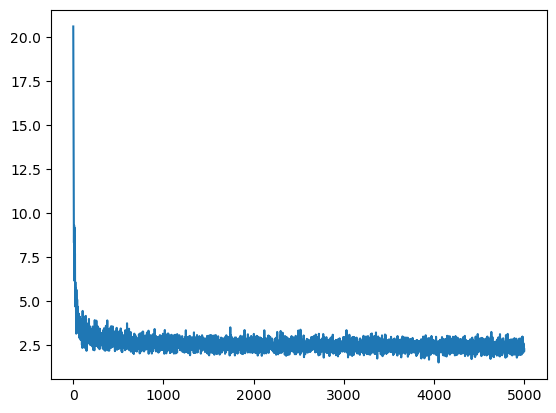

In [83]:
total_words = len(words)
# 从0 - len 这个范围选择32个数字作为一个批次
ix = torch.randint(0, total_words, (32,))
ix


import torch.nn.functional as F

block_size = 3
X, Y = [], []
for word in words[:]:
    #print(f'current word: {word}')
    # 初始化block_size个字符的位置
    context = [0] * block_size
    for ch in word + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        #print(''.join(itos[i] for i in context), '--->', itos[ix])
        # 向前滑动一个窗口
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)
print(X.shape, Y.shape)

    

epochs = 5000
lr = 0.2
g = torch.Generator().manual_seed(2147483647)
# 总词汇表 26个字符+"." 共27个字符，编码到2位的embedding空间
lookupEmbeddingtable = torch.randn((27,2), generator=g)
w1 = torch.randn((6, 100),generator=g)
b1 = torch.randn(100, generator=g)
w2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [
    lookupEmbeddingtable,
    w1,
    b1,
    w2, 
    b2,
]
parameter_size = sum(p.nelement() for p in parameters)
print(f'model parameter size {parameter_size}')
for p in parameters:
    p.requires_grad = True

epoch_list = []
loss_list = []
for epoch in range(epochs):
    ix = torch.randint(0, total_words, (32,))
    
    # 关键改动是这里，本来是针对全X进行训练，这里实际上是针对部分X进行训练，实现微批训练
    emb = lookupEmbeddingtable[X[ix]]

    h = emb.view(emb.shape[0], -1) @ w1 + b1
    h = tanh(h)

    logits = h @ w2 + b2
    
    
    loss = F.cross_entropy(logits, Y[ix])
    #print(loss)
    
    for p in parameters:
        p.grad = None
    loss.backward()
    for p in parameters:
        p.data += -lr * p.grad
    if epoch % 100 == 0:
        print(f'loss at epoch {epoch} is {loss.item()}')
    epoch_list.append(epoch)
    loss_list.append(loss.item())


import matplotlib.pyplot as plt
plt.plot(epoch_list, loss_list)
    



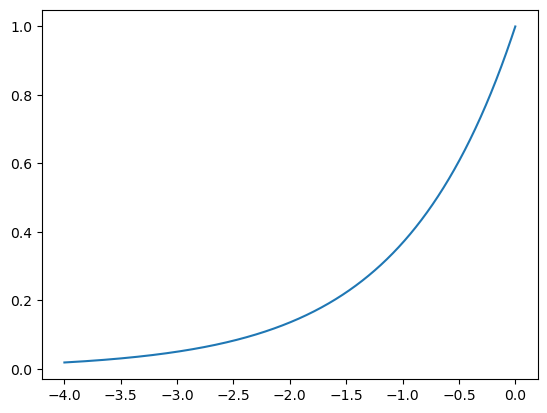

In [81]:
lrs = torch.linspace(-4, 0, 5000)
lre = torch.exp(lrs)
from matplotlib import pyplot as plt
plt.plot(lrs, lre)

torch.Size([228146, 3]) torch.Size([228146])
model parameter size 3481
loss at epoch 0 is 20.01952362060547
loss at epoch 100 is 7.849072456359863
loss at epoch 200 is 5.0254597663879395
loss at epoch 300 is 3.387587070465088
loss at epoch 400 is 2.8323981761932373
loss at epoch 500 is 3.4044864177703857
loss at epoch 600 is 3.1885974407196045
loss at epoch 700 is 2.6842358112335205
loss at epoch 800 is 2.6634585857391357
loss at epoch 900 is 2.523749828338623
loss at epoch 1000 is 2.8856492042541504
loss at epoch 1100 is 2.986196756362915
loss at epoch 1200 is 2.3061580657958984
loss at epoch 1300 is 2.982374429702759
loss at epoch 1400 is 2.291546583175659
loss at epoch 1500 is 2.4298486709594727
loss at epoch 1600 is 2.4384732246398926
loss at epoch 1700 is 2.330622434616089
loss at epoch 1800 is 2.2945609092712402
loss at epoch 1900 is 2.7370073795318604
loss at epoch 2000 is 2.4735727310180664
loss at epoch 2100 is 2.8563711643218994
loss at epoch 2200 is 2.6146395206451416
loss a

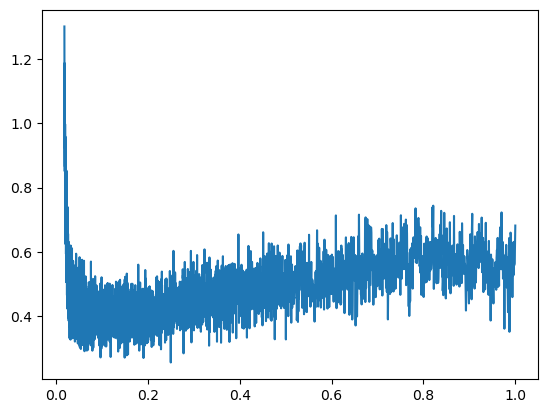

In [85]:
total_words = len(words)
# 从0 - len 这个范围选择32个数字作为一个批次
ix = torch.randint(0, total_words, (32,))
ix


import torch.nn.functional as F
import math

block_size = 3
X, Y = [], []
for word in words[:]:
    #print(f'current word: {word}')
    # 初始化block_size个字符的位置
    context = [0] * block_size
    for ch in word + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        #print(''.join(itos[i] for i in context), '--->', itos[ix])
        # 向前滑动一个窗口
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)
print(X.shape, Y.shape)

    

epochs = 5000

g = torch.Generator().manual_seed(2147483647)
# 总词汇表 26个字符+"." 共27个字符，编码到2位的embedding空间
lookupEmbeddingtable = torch.randn((27,2), generator=g)
w1 = torch.randn((6, 100),generator=g)
b1 = torch.randn(100, generator=g)
w2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [
    lookupEmbeddingtable,
    w1,
    b1,
    w2, 
    b2,
]
parameter_size = sum(p.nelement() for p in parameters)
print(f'model parameter size {parameter_size}')
for p in parameters:
    p.requires_grad = True


loss_list = []
lr_list = []
for epoch in range(epochs):
    lr = lre[epoch]
    ix = torch.randint(0, total_words, (32,))
    
    # 关键改动是这里，本来是针对全X进行训练，这里实际上是针对部分X进行训练，实现微批训练
    emb = lookupEmbeddingtable[X[ix]]

    h = emb.view(emb.shape[0], -1) @ w1 + b1
    h = tanh(h)

    logits = h @ w2 + b2
    
    
    loss = F.cross_entropy(logits, Y[ix])
    #print(loss)
    
    for p in parameters:
        p.grad = None
    loss.backward()
    for p in parameters:
        p.data += -lr * p.grad
    if epoch % 100 == 0:
        print(f'loss at epoch {epoch} is {loss.item()}')
    lr_list.append(lr)
    loss_list.append(math.log10(loss.item()))


import matplotlib.pyplot as plt
plt.plot(lr_list, loss_list)

# 如何设置训练集、验证集

In [87]:
# 将全量样本分拆训练集，测试集
import random 
random.seed(42)
random.shuffle(words)
split = int(0.9 * len(words))
train_words = words[:split]
valid_words = words[split:]
print(f'train words {len(train_words)}, valid words {len(valid_words)}')


def transfer_data(words):

    block_size = 3
    X, Y = [], []
    for word in words[:]:
        #print(f'current word: {word}')
        # 初始化block_size个字符的位置
        context = [0] * block_size
        for ch in word + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            #print(''.join(itos[i] for i in context), '--->', itos[ix])
            # 向前滑动一个窗口
            context = context[1:] + [ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X,Y 

TRAIN_X, TRAIN_Y = transfer_data(train_words)
VALID_X, VALID_Y = transfer_data(valid_words)



train words 28829, valid words 3204
torch.Size([205347, 3]) torch.Size([205347])
torch.Size([22799, 3]) torch.Size([22799])


model parameter size 3481
loss at epoch 0 is 19.36478042602539
loss at epoch 100 is 3.9599196910858154
loss at epoch 200 is 2.969526529312134
loss at epoch 300 is 2.9319655895233154
loss at epoch 400 is 3.279217004776001
loss at epoch 500 is 2.7198972702026367
loss at epoch 600 is 2.815948963165283
loss at epoch 700 is 3.0295777320861816
loss at epoch 800 is 2.916158676147461
loss at epoch 900 is 2.4544050693511963
loss at epoch 1000 is 2.6343932151794434
loss at epoch 1100 is 2.560213327407837
loss at epoch 1200 is 3.2661595344543457
loss at epoch 1300 is 2.3145058155059814
loss at epoch 1400 is 2.4738144874572754
loss at epoch 1500 is 2.5309898853302
loss at epoch 1600 is 2.5227842330932617
loss at epoch 1700 is 2.973642110824585
loss at epoch 1800 is 2.988307476043701
loss at epoch 1900 is 2.550096273422241
loss at epoch 2000 is 2.325637102127075
loss at epoch 2100 is 2.9590036869049072
loss at epoch 2200 is 2.4632465839385986
loss at epoch 2300 is 2.644109010696411
loss at epoch 24

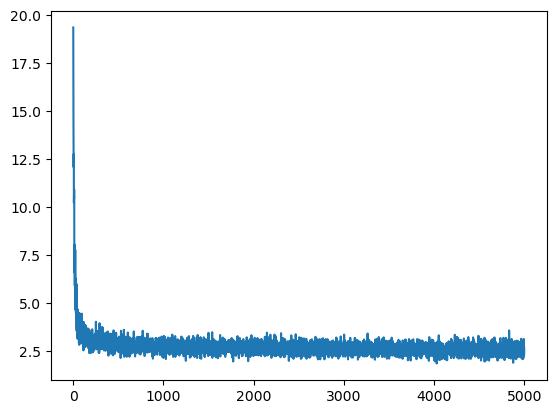

In [91]:

epochs = 5000
lr = 0.2
g = torch.Generator().manual_seed(2147483647)
# 总词汇表 26个字符+"." 共27个字符，编码到2位的embedding空间
lookupEmbeddingtable = torch.randn((27,2), generator=g)
w1 = torch.randn((6, 100),generator=g)
b1 = torch.randn(100, generator=g)
w2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [
    lookupEmbeddingtable,
    w1,
    b1,
    w2, 
    b2,
]
parameter_size = sum(p.nelement() for p in parameters)
print(f'model parameter size {parameter_size}')
for p in parameters:
    p.requires_grad = True

epoch_list = []
loss_list = []
for epoch in range(epochs):
    ix = torch.randint(0, total_words, (32,))
    
    # 关键改动是这里，本来是针对全X进行训练，这里实际上是针对部分X进行训练，实现微批训练
    emb = lookupEmbeddingtable[TRAIN_X[ix]]

    h = emb.view(emb.shape[0], -1) @ w1 + b1
    h = tanh(h)

    logits = h @ w2 + b2
    
    
    loss = F.cross_entropy(logits, TRAIN_Y[ix])
    #print(loss)
    
    for p in parameters:
        p.grad = None
    loss.backward()
    for p in parameters:
        p.data += -lr * p.grad
    if epoch % 100 == 0:
        print(f'loss at epoch {epoch} is {loss.item()}')
    epoch_list.append(epoch)
    loss_list.append(loss.item())


import matplotlib.pyplot as plt
plt.plot(epoch_list, loss_list)

In [92]:
emb = lookupEmbeddingtable[VALID_X]

h = emb.view(emb.shape[0], -1) @ w1 + b1
h = tanh(h)
logits = h @ w2 + b2
loss = F.cross_entropy(logits, VALID_Y)
print(loss)

tensor(2.6625, grad_fn=<NllLossBackward0>)


# 加大神经元规模
隐藏层神经元是100，我们看看增加到300个会不会改善结果

train words 28829, valid words 3204
torch.Size([205334, 3]) torch.Size([205334])
torch.Size([22812, 3]) torch.Size([22812])
model parameter size 6881
loss at epoch 0 is 22.29701042175293
loss at epoch 100 is 3.45959210395813
loss at epoch 200 is 3.1218652725219727
loss at epoch 300 is 3.524722099304199
loss at epoch 400 is 2.93572735786438
loss at epoch 500 is 2.9604995250701904
loss at epoch 600 is 2.7862203121185303
loss at epoch 700 is 2.7087490558624268
loss at epoch 800 is 2.751328945159912
loss at epoch 900 is 2.664114236831665
loss at epoch 1000 is 2.4802892208099365
loss at epoch 1100 is 2.7118752002716064
loss at epoch 1200 is 2.6109888553619385
loss at epoch 1300 is 2.6996593475341797
loss at epoch 1400 is 2.5898311138153076
loss at epoch 1500 is 2.81958270072937
loss at epoch 1600 is 2.475989580154419
loss at epoch 1700 is 2.692206859588623
loss at epoch 1800 is 2.6336326599121094
loss at epoch 1900 is 2.4040300846099854
loss at epoch 2000 is 2.635024309158325
loss at epoch 

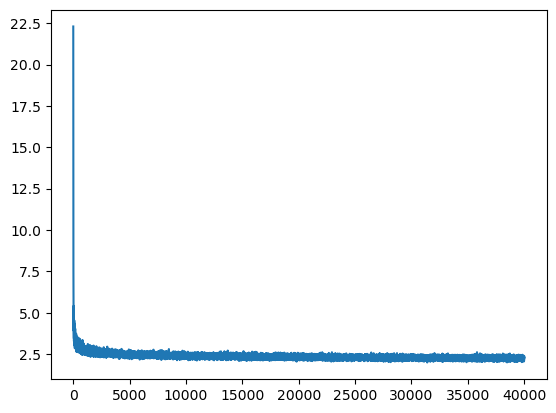

valid loss 2.3343019485473633


In [108]:
# 将全量样本分拆训练集，测试集
import random 
random.seed(42)
random.shuffle(words)
split = int(0.9 * len(words))
train_words = words[:split]
valid_words = words[split:]
print(f'train words {len(train_words)}, valid words {len(valid_words)}')


def transfer_data(words):

    block_size = 3
    X, Y = [], []
    for word in words[:]:
        #print(f'current word: {word}')
        # 初始化block_size个字符的位置
        context = [0] * block_size
        for ch in word + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            #print(''.join(itos[i] for i in context), '--->', itos[ix])
            # 向前滑动一个窗口
            context = context[1:] + [ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X,Y 

TRAIN_X, TRAIN_Y = transfer_data(train_words)
VALID_X, VALID_Y = transfer_data(valid_words)

epochs = 40000
lr = 0.2
g = torch.Generator().manual_seed(2147483647)
# 总词汇表 26个字符+"." 共27个字符，编码到2位的embedding空间
lookupEmbeddingtable = torch.randn((27,2), generator=g)
w1 = torch.randn((6, 200),generator=g)
b1 = torch.randn(200, generator=g)
w2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [
    lookupEmbeddingtable,
    w1,
    b1,
    w2, 
    b2,
]
parameter_size = sum(p.nelement() for p in parameters)
print(f'model parameter size {parameter_size}')
for p in parameters:
    p.requires_grad = True

epoch_list = []
loss_list = []
for epoch in range(epochs):
    ix = torch.randint(0, total_words, (256,))
    
    # 关键改动是这里，本来是针对全X进行训练，这里实际上是针对部分X进行训练，实现微批训练
    emb = lookupEmbeddingtable[TRAIN_X[ix]]

    h = emb.view(emb.shape[0], -1) @ w1 + b1
    h = tanh(h)

    logits = h @ w2 + b2
    
    
    loss = F.cross_entropy(logits, TRAIN_Y[ix])
    #print(loss)
    
    for p in parameters:
        p.grad = None
    loss.backward()
    for p in parameters:
        p.data += -lr * p.grad
    if epoch % 100 == 0:
        print(f'loss at epoch {epoch} is {loss.item()}')
    epoch_list.append(epoch)
    loss_list.append(loss.item())


import matplotlib.pyplot as plt
plt.plot(epoch_list, loss_list)
plt.show()

emb = lookupEmbeddingtable[VALID_X]

h = emb.view(emb.shape[0], -1) @ w1 + b1
h = tanh(h)
logits = h @ w2 + b2
loss = F.cross_entropy(logits, VALID_Y)
print(f'valid loss {loss}')

通过调整神经元的大小，发现反而损失变差了，理论上应该会变好或者保持差不多的水平，目前看下去应该是embedding的嵌入空间维度太小了，我们尝试扩大一下嵌入向量的维度，看看是否能够得到更好的结果。

train words 28829, valid words 3204
torch.Size([205345, 3]) torch.Size([205345])
torch.Size([22801, 3]) torch.Size([22801])
model parameter size 20135
loss at epoch 0 is 38.83724594116211
loss at epoch 100 is 7.735499858856201
loss at epoch 200 is 8.849056243896484
loss at epoch 300 is 5.088226318359375
loss at epoch 400 is 4.856998920440674
loss at epoch 500 is 4.0587334632873535
loss at epoch 600 is 4.275457859039307
loss at epoch 700 is 3.792705774307251
loss at epoch 800 is 3.5351946353912354
loss at epoch 900 is 4.801391124725342
loss at epoch 1000 is 3.8211159706115723
loss at epoch 1100 is 2.801121950149536
loss at epoch 1200 is 3.79219913482666
loss at epoch 1300 is 2.9105629920959473
loss at epoch 1400 is 3.793952465057373
loss at epoch 1500 is 3.2022297382354736
loss at epoch 1600 is 3.3112239837646484
loss at epoch 1700 is 3.1008448600769043
loss at epoch 1800 is 3.454038619995117
loss at epoch 1900 is 3.500037908554077
loss at epoch 2000 is 3.2717080116271973
loss at epoch 

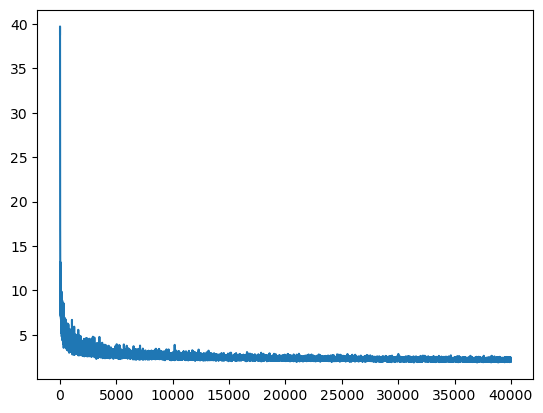

valid loss 2.553370952606201


In [110]:
# 将全量样本分拆训练集，测试集
import random 
random.seed(42)
random.shuffle(words)
split = int(0.9 * len(words))
train_words = words[:split]
valid_words = words[split:]
print(f'train words {len(train_words)}, valid words {len(valid_words)}')


def transfer_data(words):

    block_size = 3
    X, Y = [], []
    for word in words[:]:
        #print(f'current word: {word}')
        # 初始化block_size个字符的位置
        context = [0] * block_size
        for ch in word + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            #print(''.join(itos[i] for i in context), '--->', itos[ix])
            # 向前滑动一个窗口
            context = context[1:] + [ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X,Y 

TRAIN_X, TRAIN_Y = transfer_data(train_words)
VALID_X, VALID_Y = transfer_data(valid_words)

epochs = 40000
lr = 0.2
g = torch.Generator().manual_seed(2147483647)
# 总词汇表 26个字符+"." 共27个字符，调整大的嵌入向量的维度，从2 -> 20
lookupEmbeddingtable = torch.randn((27,4), generator=g)
w1 = torch.randn((12, 500),generator=g)
b1 = torch.randn(500, generator=g)
w2 = torch.randn((500, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [
    lookupEmbeddingtable,
    w1,
    b1,
    w2, 
    b2,
]
parameter_size = sum(p.nelement() for p in parameters)
print(f'model parameter size {parameter_size}')
for p in parameters:
    p.requires_grad = True

epoch_list = []
loss_list = []
for epoch in range(epochs):
    ix = torch.randint(0, total_words, (256,))
    
    # 关键改动是这里，本来是针对全X进行训练，这里实际上是针对部分X进行训练，实现微批训练
    emb = lookupEmbeddingtable[TRAIN_X[ix]]

    h = emb.view(emb.shape[0], -1) @ w1 + b1
    h = tanh(h)

    logits = h @ w2 + b2
    
    
    loss = F.cross_entropy(logits, TRAIN_Y[ix])
    #print(loss)
    
    for p in parameters:
        p.grad = None
    loss.backward()
    for p in parameters:
        p.data += -lr * p.grad
    if epoch % 100 == 0:
        print(f'loss at epoch {epoch} is {loss.item()}')
    epoch_list.append(epoch)
    loss_list.append(loss.item())


import matplotlib.pyplot as plt
plt.plot(epoch_list, loss_list)
plt.show()

emb = lookupEmbeddingtable[VALID_X]

h = emb.view(emb.shape[0], -1) @ w1 + b1
h = tanh(h)
logits = h @ w2 + b2
loss = F.cross_entropy(logits, VALID_Y)
print(f'valid loss {loss}')

下面我们通过训练好的神经网络进行字符采样

In [128]:


word_indx = []
idx = [0] * block_size
while True:
    
    
    input = lookupEmbeddingtable[torch.tensor([idx])]
    h1 = input.view(-1, 12) @w1 + b1
    h = tanh(h1)
    prob = h @ w2 + b2
    
    prob = F.softmax(prob, dim=1)
   
    choose_idx = torch.multinomial(prob, num_samples=1, generator=g)
    choose_idx = choose_idx.item()
    idx = idx[1:] + [choose_idx]
    word_indx.append(choose_idx)
    if choose_idx == 0:
        break

word = ''.join(itos[i] for i in word_indx)
print(f'采样出的单词是{word}')

采样出的单词是adraaray.


采样多个单词

In [129]:
sample_words = 20

for _ in range(sample_words):
    word_indx = []
    idx = [0] * block_size
    while True:
        
        
        input = lookupEmbeddingtable[torch.tensor([idx])]
        h1 = input.view(-1, 12) @w1 + b1
        h = tanh(h1)
        prob = h @ w2 + b2
        
        prob = F.softmax(prob, dim=1)
    
        choose_idx = torch.multinomial(prob, num_samples=1, generator=g)
        choose_idx = choose_idx.item()
        idx = idx[1:] + [choose_idx]
        word_indx.append(choose_idx)
        if choose_idx == 0:
            break

    word = ''.join(itos[i] for i in word_indx)
    print(f'采样出的单词是{word}')

采样出的单词是alyliannah.
采样出的单词是fox.
采样出的单词是alayalle.
采样出的单词是lann.
采样出的单词是amaequiniratiancendraadreannah.
采样出的单词是raitanrlee.
采样出的单词是shana.
采样出的单词是raylani.
采样出的单词是tainana.
采样出的单词是rickernamilaynahar.
采样出的单词是luice.
采样出的单词是araldz.
采样出的单词是taunt.
采样出的单词是avalayaana.
采样出的单词是raidalmjn.
采样出的单词是whruvetten.
采样出的单词是tari.
采样出的单词是alingelayanaina.
采样出的单词是avennltyana.
采样出的单词是rariyan.
